# sparks foundation
## task 2
## name: Naira Anwer Hashem

### Prediction using unsupervised learning (K-means cluster on iris dataset)

In [1]:
#importing all necessary libiraries

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

now let's import the iris dataset 

In [2]:
iris= datasets.load_iris()
iris_data= pd.DataFrame(iris.data, columns= iris.feature_names)

let's have a look at the dataset

In [3]:
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## now let's find the optimum number of clusters 

### we will use the elbow method
#### Elbow method is when we select the number of clusters where the change in WCSS begins to level off 
#### WCSS stands for within cluster sum of squares

In [4]:
iri = iris_data.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters= i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iri)
    wcss.append(kmeans.inertia_)
    
    

#### now we will plot the results into a line graph to demonstrate the elbow

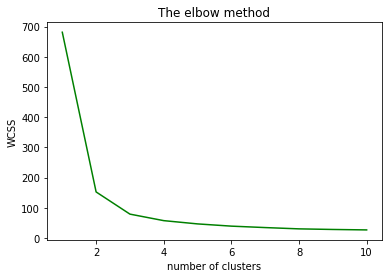

In [5]:
plt.plot(range(1,11),wcss,color="green")
plt.title("The elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

the optimum cluster number is where the elbow occurs
#### based on this graph we will set the number of clusters to "3"

### now let's creat the classifier and apply it to the dataset

In [6]:
kmeans= KMeans(n_clusters= 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans_p= kmeans.fit_predict(iri)
    

### now let's visualize the clusters based on the first two col (0 , 1)

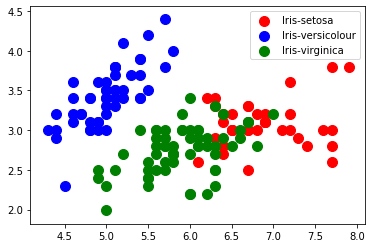

In [7]:
plt.scatter(iri[kmeans_p == 0, 0], iri[kmeans_p == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iri[kmeans_p == 1, 0], iri[kmeans_p == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iri[kmeans_p == 2, 0], iri[kmeans_p == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()